In [135]:
import numpy as np
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from scipy import spatial
import scipy.spatial.distance as dist
from sklearn.metrics import silhouette_score

### Task 1

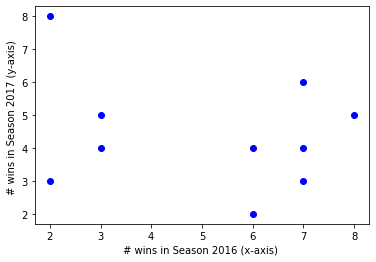

In [87]:
x1 = np.array([3,5])
x2 = np.array([3,4])
x3 = np.array([2,8])
x4 = np.array([2,3])
x5 = np.array([6,2])
x6 = np.array([6,4])
x7 = np.array([7,3])
x8 = np.array([7,4])
x9 = np.array([8,5])
x10 = np.array([7,6])
samples = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]

x = np.array([3,3,2,2,6,6,7,7,8,7])
y = np.array([5,4,8,3,2,4,3,4,5,6])
plt.xlabel("# wins in Season 2016 (x-axis) ") 
plt.ylabel("# wins in Season 2017 (y-axis) ") 
plt.plot(x,y,"ob") 
plt.show()

>(1) Initialize with two centroids, (4, 6) and (5, 4). Use Manhattan distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters.

In [70]:
# Calculate the Manhattan distance between x1 and c1
c1 = np.array([4,6])
c2 = np.array([5,4])

distance_c1 = list()
distance_c2 = list()

for i in samples:
    md_c1 = np.sum(np.abs(i-c1))
    distance_c1.append(md_c1)
    md_c2 = np.linalg.norm(i-c2,ord=1)
    distance_c2.append(md_c2)


print(distance_c1)
print("="*50)
print(distance_c2)

[2, 3, 4, 5, 6, 4, 6, 5, 5, 3]
[3.0, 2.0, 7.0, 4.0, 3.0, 1.0, 3.0, 2.0, 4.0, 4.0]


>(2) Initialize with two centroids, (4, 6) and (5, 4). Use Euclidean distance as the distance metric.
First, perform one iteration of the K-means algorithm and report the coordinates of the
resulting centroids. Second, please use K-Means to find two clusters.

In [72]:
# Calculate the Euclidean distance between x1 and c1
c1 = np.array([4,6])
c2 = np.array([5,4])
distance_c1 = list()
distance_c2 = list()

for i in samples:
    ed_c1 = np.sqrt(np.sum(np.square(i-c1)))
    ed_c1 = np.around(ed_c1, decimals=2)
    distance_c1.append(ed_c1)
    ed_c2 = np.linalg.norm(i-c2,ord=2)
    ed_c2 = np.around(ed_c2, decimals=2)
    distance_c2.append(ed_c2)
    

print(distance_c1)
print("="*50)
print(distance_c2)

[1.41, 2.24, 2.83, 3.61, 4.47, 2.83, 4.24, 3.61, 4.12, 3.0]
[2.24, 2.0, 5.0, 3.16, 2.24, 1.0, 2.24, 2.0, 3.16, 2.83]


>(3) Initialize with two centroids, (3, 3) and (8, 3). Use Manhattan distance as the distance metric.First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters.

In [75]:
# Calculate the Manhattan distance between x1 and c1
c1 = np.array([3,3])
c2 = np.array([8,3])
distance_c1 = list()
distance_c2 = list()

for i in samples:
    md_c1 = np.sum(np.abs(i-c1))
    distance_c1.append(md_c1)
    md_c2 = np.linalg.norm(i-c2,ord=1)
    distance_c2.append(md_c2)
    
print(distance_c1)
print("="*50)
print(distance_c2)

[2, 1, 6, 1, 4, 4, 4, 5, 7, 7]
[7.0, 6.0, 11.0, 6.0, 3.0, 3.0, 1.0, 2.0, 2.0, 4.0]


>(4) Initialize with two centroids, (3, 2) and (4, 8). Use Manhattan distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids. Second, please use K-Means to find two clusters.

In [76]:
# Calculate the Manhattan distance between x1 and c1
c1 = np.array([3,2])
c2 = np.array([4,8])
distance_c1 = list()
distance_c2 = list()

for i in samples:
    md_c1 = np.sum(np.abs(i-c1))
    distance_c1.append(md_c1)
    md_c2 = np.linalg.norm(i-c2,ord=1)
    distance_c2.append(md_c2)
    
print(distance_c1)
print("="*50)
print(distance_c2)

[3, 2, 7, 2, 3, 5, 5, 6, 8, 8]
[4.0, 5.0, 2.0, 7.0, 8.0, 6.0, 8.0, 7.0, 7.0, 5.0]


## Task 2

In [149]:
data = load_iris().data
label = load_iris()['target']
std = StandardScaler()
data = std.fit_transform(data)
km = KMeans(n_clusters=3) 
km.fit_transform(data)
predict = km.predict(data)

In [150]:
cosine_similarity = 1 - spatial.distance.cosine(predict, label)
print("cosine similarity:", cosine_similarity)

cosine similarity: 0.8527855787026674


In [151]:
matV = mat([predict,label])
j_dist = dist.pdist(matV,'jaccard')
print ("jaccard distance:", j_dist)

jaccard distance: [0.75]


In [152]:
silhouette_score(data,predict)

0.45994823920518635

In [134]:
def KMeans_cosine_fit(sparse_data, nclust = 3, njobs=-1, randomstate=None):
    # Manually override euclidean
    def euc_dist(X, Y = None, Y_norm_squared = None, squared = False):
        #return pairwise_distances(X, Y, metric = 'cosine', n_jobs = 10)
        return np.arccos(cosine_similarity(X, Y))/np.pi
    KMeans.euclidean_distances = euc_dist
    kmeans = KMeans(n_clusters = nclust, n_jobs = njobs, random_state = randomstate)
    _ = kmeans.fit(sparse_data)
    return kmeans

km_cos = KMeans_cosine_fit(data)

D:\Applications\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
